regression_2.ipynb

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

In [2]:
np.random.seed(100)

In [3]:
#True data points
def make_real_y(x):
    m = 1.5
    c = 5
    var = 3*np.random.random() #Gaussian likelihood
    y = x*m + c + var
    return y

x = range(0, 20, 1)
y = [make_real_y(x) for x in x]
real_y_sd = np.random.randint(1, 7, len(x))
y_error = np.random.normal(0, 1, size=len(x))

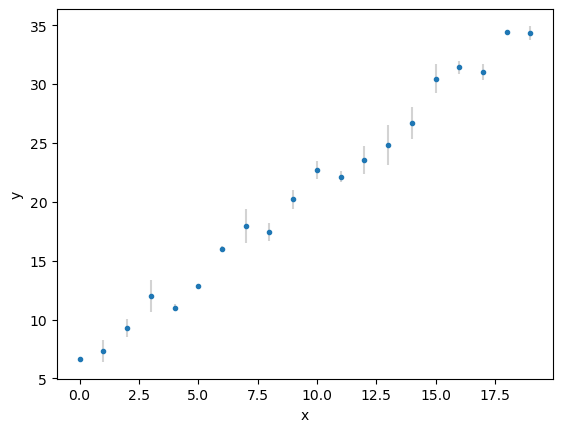

In [4]:
plt.errorbar(x, y, yerr=y_error, fmt='.', ecolor='LightGrey', label="Expected")
plt.xlabel("x")
plt.ylabel("y")
# plt.legend()
plt.show()

In [5]:
def likelihood(params):
    m, c, sigma = params

    y_m = m * x + c

    # L = (len(x)/2 * np.log(2 * np.pi) + len(x)/2 * np.log(sigma ** 2) + 1 /
    #      (2 * sigma ** 2) * sum((y - y_exp) ** 2))
    
    L = 0
    for y_i, y_m_i in zip(y, y_m):
        L += (-0.5 * ((y_i - y_m_i)**2 / sigma**2))
    L = L + (len(x) / 2) * np.log(2 * np.pi * sigma**2) 

    return L

In [6]:
m, c, sigma = 1.5, 6, 1
guess = [m, c, sigma]
likelihood_model = optimize.minimize(likelihood, guess)#, method='Nelder-Mead'
print(likelihood)

y_m = likelihood_model['x'][0] * x + likelihood_model['x'][1]
residual = y - y_m

<function likelihood at 0x000002535494E830>


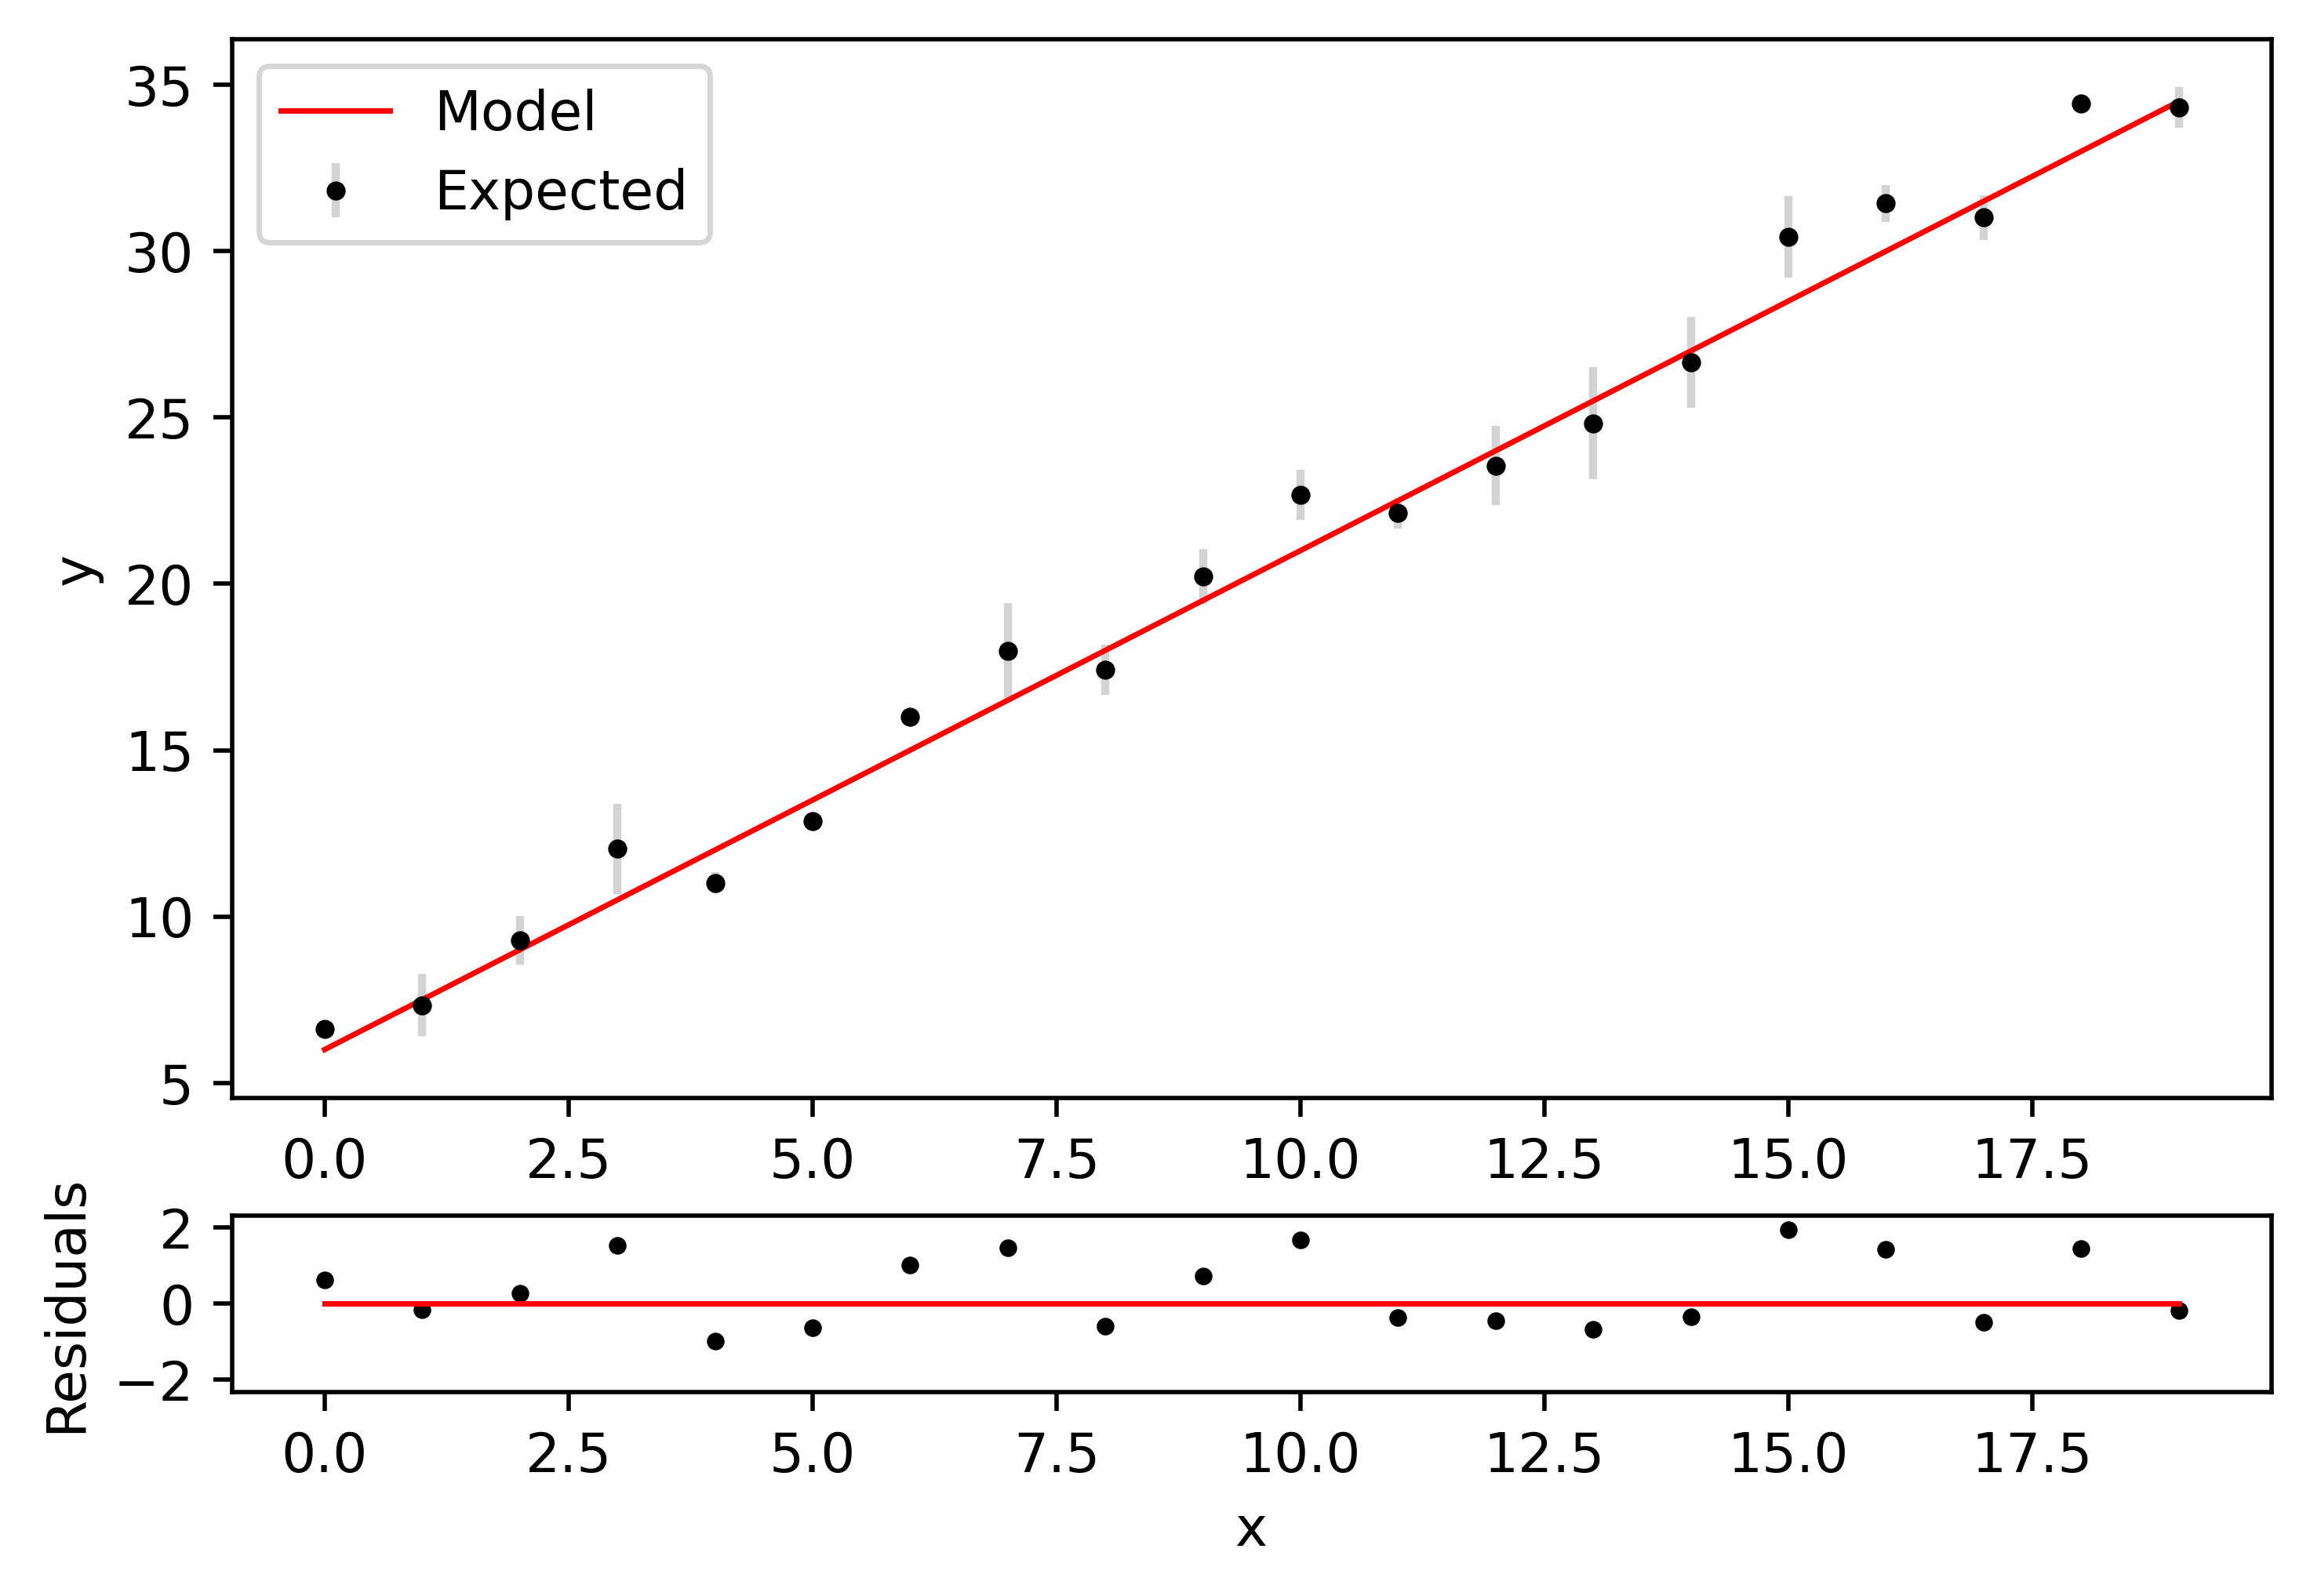

In [7]:
#Panel settings
left = 0.1
bottom = 0.1
width = 0.65
height = 0.9
spacing = -1.15

rect = [left, bottom, width, height]
rect_res = [left, bottom+height+spacing, width, 0.15]

fig = plt.figure(figsize=(8, 3), dpi=500)
ax = fig.add_axes(rect)

ax_res = fig.add_axes(rect_res, sharex=ax)

#Top panel
ax.errorbar(x, y, yerr=y_error, fmt='.', markersize=5, color='black', ecolor='LightGrey', label="Expected")
ax.plot(x, y_m, color='red',label="Model", lw=1)
ax.set(ylabel = "y")
# ax.set_xlim((min(x), max(x)))
ax.legend()

#Bottom panel
ax_res.scatter(x, residual, color='black', s=5)
ax_res.set_ylim((-max(abs(residual))*1.2, max(abs(residual)*1.2)))
ax_res.plot([min(x), max(x)], [0, 0], color='red', lw=1)
ax_res.set(xlabel="x", ylabel="Residuals")

plt.show()